<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 71kB 20.7MB/s eta 0:00:01


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [4]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [5]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [6]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [8]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [9]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [10]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1629270033508, 45456.9053086226],
 [1629273654280, 45046.3401985749],
 [1629277369596, 45242.4144893515],
 [1629280940630, 45477.622805276726],
 [1629284439432, 45394.4633581153]]

Finally lets turn this data into a Pandas DataFrame.


In [11]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1629270033508,45456.905309
1,1629273654280,45046.340199
2,1629277369596,45242.414489
3,1629280940630,45477.622805
4,1629284439432,45394.463358
...,...,...
717,1631847887069,47843.936533
718,1631851451815,47921.167810
719,1631855252686,48199.636894
720,1631858541845,48112.370620


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [12]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data

,TimeStamp,Price,date
0,1629270033508,45456.905309,2021-08-18
1,1629273654280,45046.340199,2021-08-18
2,1629277369596,45242.414489,2021-08-18
3,1629280940630,45477.622805,2021-08-18
4,1629284439432,45394.463358,2021-08-18
...,...,...,...
717,1631847887069,47843.936533,2021-09-17
718,1631851451815,47921.167810,2021-09-17
719,1631855252686,48199.636894,2021-09-17
720,1631858541845,48112.370620,2021-09-17


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [31]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2021-06-30  34252.392988  35339.157026  35037.848764  34799.292228
1   2021-07-01  33056.069850  35171.486305  35171.486305  33681.582285
2   2021-07-02  32848.177624  33788.207268  33655.700450  33788.207268
3   2021-07-03  33497.644091  34915.173221  33950.786555  34603.241577
4   2021-07-04  34564.754842  35999.840044  34788.714561  35440.429321
5   2021-07-05  33477.870784  35394.213074  35394.213074  34170.772858
6   2021-07-06  33790.483678  34981.755700  33906.628319  34147.136582
7   2021-07-07  34197.818307  34896.269656  34197.818307  34246.718293
8   2021-07-08  32419.564309  33932.254638  33932.254638  32573.549339
9   2021-07-09  32406.328806  34062.786216  32933.578199  34062.786216
10  2021-07-10  33407.343222  34247.224326  33971.297750  33686.074362
11  2021-07-11  33516.675249  34596.640048  33667.122789  34461.454130
12  2021-07-12  32882.912733  34596.993395  34295.402708  33153.003562
13  2021-07-13  32418.781521  33327.475007  33260.852775  32572.967298
14  2021-07-14  31856.382637  33094.153414  32728.919579  33094.153414
15  2021-07-15  31372.653494  33098.661964  32878.501874  31850.536937
16  2021-07-16  31174.142554  32196.821372  31686.635174  31602.173425
17  2021-07-17  31340.322628  31973.261936  31404.365509  31704.688442
18  2021-07-18  31262.148761  32239.857247  31588.671351  31614.674468
19  2021-07-19  30693.310473  31931.418112  31919.393923  30965.831961
20  2021-07-20  29599.878053  30974.897413  30928.211909  29599.878053
21  2021-07-21  29659.302838  32268.756320  29916.705054  32119.049551
22  2021-07-22  31920.429443  32540.290282  32313.670421  32265.141095
23  2021-07-23  32180.828599  33367.693486  32385.972610  33367.693486
24  2021-07-24  33518.753514  34458.753006  33518.753514  34055.867021
25  2021-07-25  33984.608998  34749.942488  34296.872673  34624.035758
26  2021-07-26  35527.011367  39841.370269  35527.011367  37413.736771
27  2021-07-27  36547.977268  39265.542289  37226.653324  39265.542289
28  2021-07-28  38457.399449  40840.142596  39076.593771  39752.003988
29  2021-07-29  39476.953676  40616.613873  40031.198244  39838.622125
30  2021-07-30  39704.347293  40101.458919  39977.756939  39742.068027

Finally we are now ready to use plotly to create our Candlestick Chart.


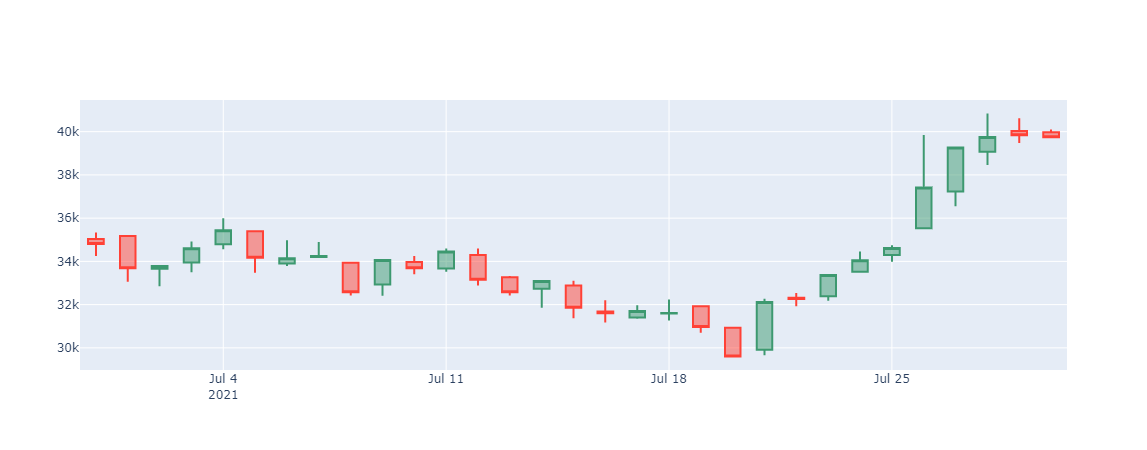

In [32]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-23 | 3.0 | Azim Hirjani | New API |
| 2020-09-09 | 2.1 | Malika Singla | Spell Check |
| 2020-08-26  | 2.0  | Lavanya | Moved lab to course repo in GitLab |
|   |   |   |   |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
